<a href="https://colab.research.google.com/github/cyrusnavasca/heart-disease-ml/blob/main/Heart_Disease_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling

In [ ]:
# Installing dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [ ]:
# Reading data
df = pd.read_csv('heart (1).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Our data does not contain any null values but we can further explore the data to examine areas that need to be addressed before analysis.

Text(0.5, 0.98, 'Histograms of Continuous Variables')

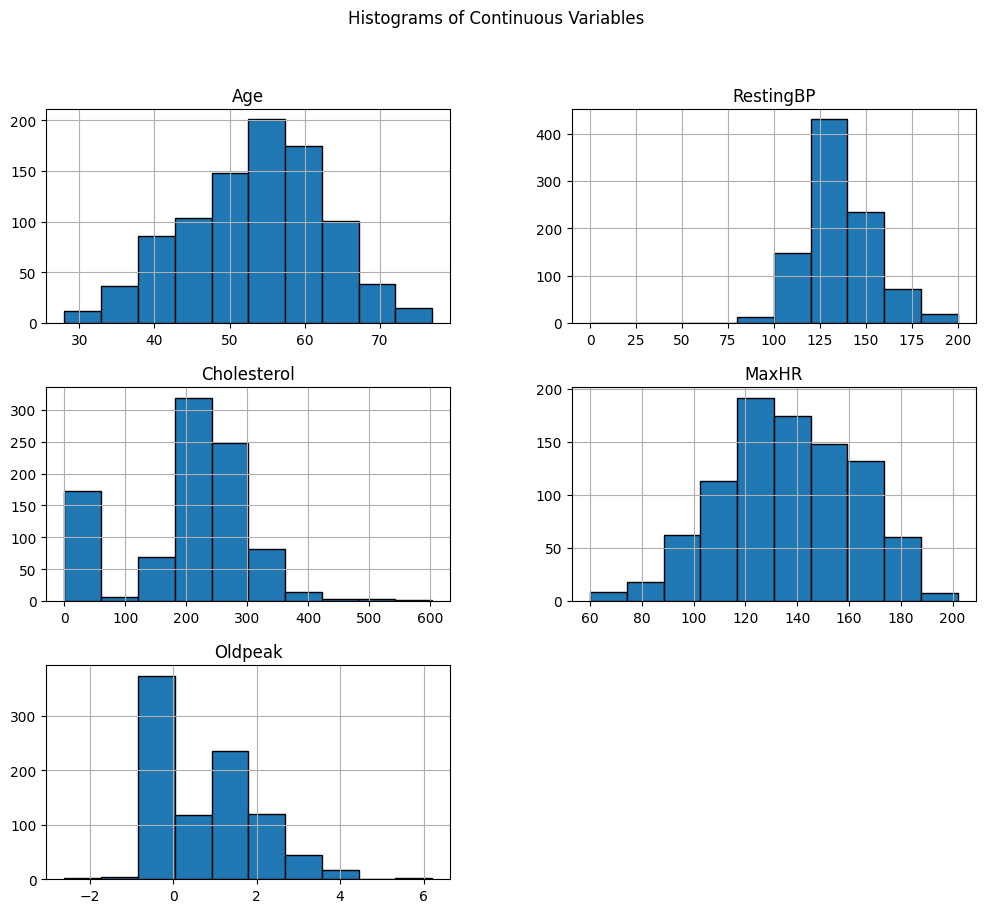

In [ ]:
# Creating a data frame of continuous variables
cont_variables = df.drop(['Sex', 'ChestPainType', 'FastingBS', 'RestingECG',
                          'ExerciseAngina', 'ST_Slope', 'HeartDisease'], axis=1)

cont_variables.hist(edgecolor="black", figsize = (12, 10))
plt.suptitle("Histograms of Continuous Variables")

<ipython-input-4-078959162bea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_variables['FastingBS'] = np.where(cat_variables['FastingBS'] == 1,
<ipython-input-4-078959162bea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_variables['HeartDisease'] = np.where(cat_variables['HeartDisease'] == 1,


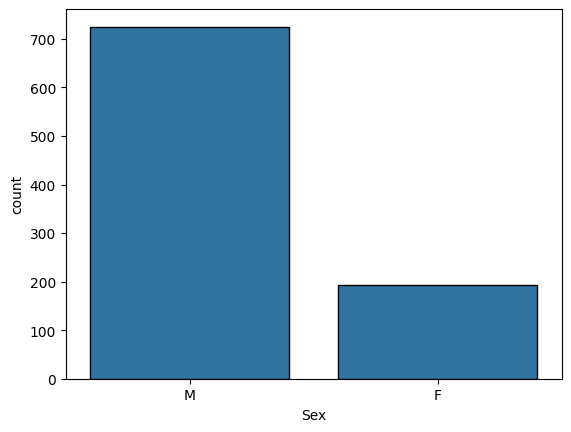

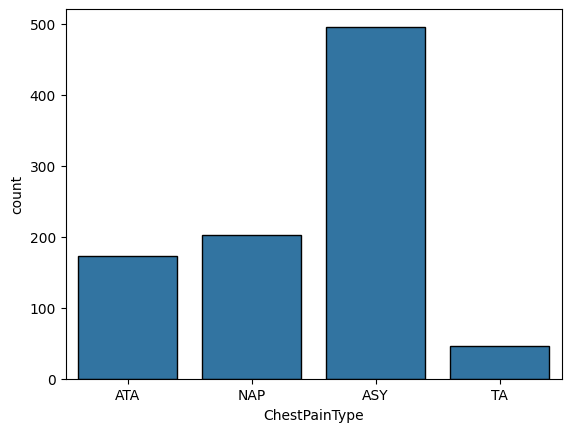

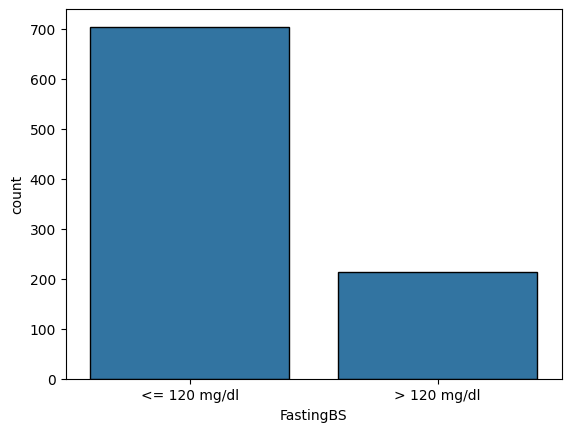

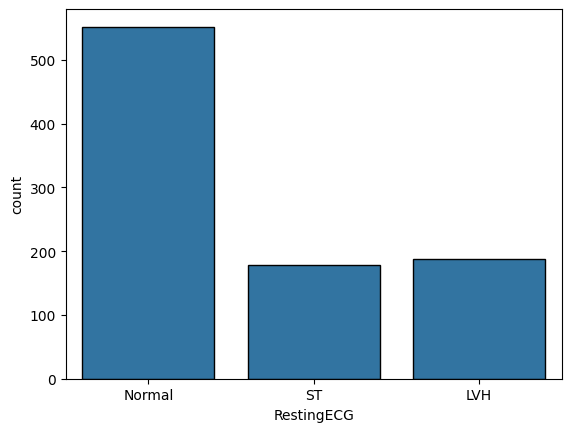

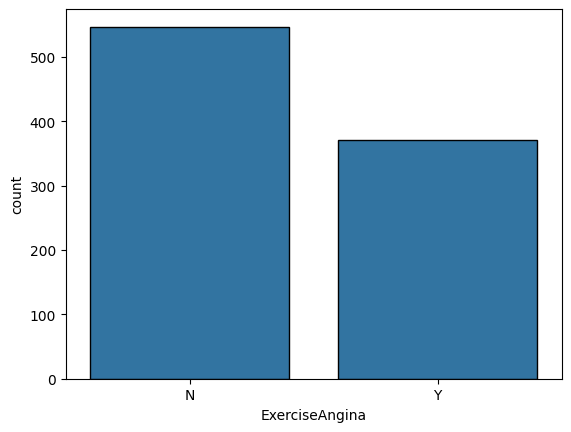

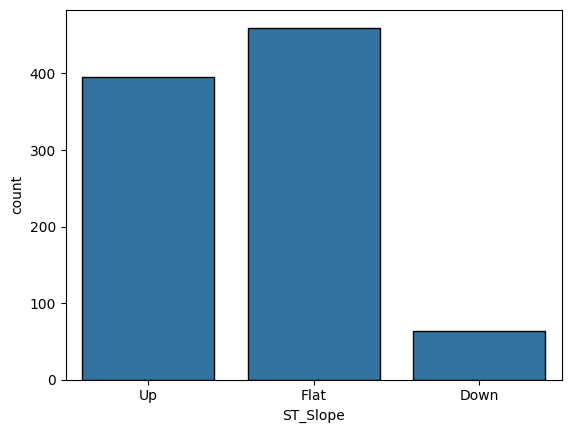

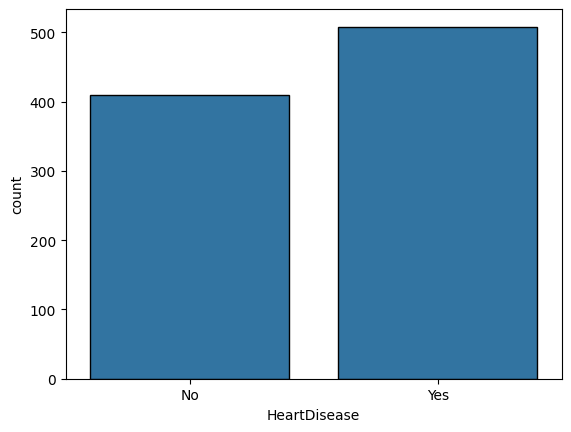

In [ ]:
# Creating a data frame of categorical variables
cat_variables = df[['Sex', 'ChestPainType', 'FastingBS', 'RestingECG',
                   'ExerciseAngina', 'ST_Slope', 'HeartDisease']]

cat_variables['FastingBS'] = np.where(cat_variables['FastingBS'] == 1,
                                      "> 120 mg/dl", "<= 120 mg/dl")

cat_variables['HeartDisease'] = np.where(cat_variables['HeartDisease'] == 1,
                                      "Yes", "No")

# Creating bar charts
for column in cat_variables:
    sns.countplot(x=column, data=cat_variables, edgecolor="black")
    plt.show()

In [ ]:
# Encoding categorical data as factors
df['Sex'] = np.where(df['Sex'] == 'M', 1, 0)
df['ChestPainType'] = np.where(df['ChestPainType'] == 'ASY', 0, 1)
df['RestingECG'] = np.where(df['RestingECG'] == 'Normal', 0, 1)
df['ExerciseAngina'] = np.where(df['ExerciseAngina'] == 'N', 0, 1)
df['ST_Slope'] = np.where(df['ST_Slope'] == 'Down', -1,
                          np.where(df['ST_Slope'] == 'Flat', 0,
                                   np.where(df['ST_Slope'] == 'Up', 1, 10)))

# Renaming ChestPain column
df.rename(columns={'ChestPainType': 'ChestPain'}, inplace=True)

# Output first 5 rows of clean dataset
df.head()

,Age,Sex,ChestPain,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,1,0
1,49,0,1,160,180,0,0,156,0,1.0,0,1
2,37,1,1,130,283,0,1,98,0,0.0,1,0
3,48,0,0,138,214,0,0,108,1,1.5,0,1
4,54,1,1,150,195,0,0,122,0,0.0,1,0


In [ ]:
# Calculate the probabilities of each unique value in the Cholesterol variable
numeric_probabilities = df['Cholesterol'].value_counts(normalize=True)

# Randomly sample from the above distribution to replace zero values
zeroes = np.where(df['Cholesterol'] == 0)
df['Cholesterol'] = df['Cholesterol'].replace(0,int(np.random.choice(
  numeric_probabilities.index,
  size=len(zeroes),
  p=numeric_probabilities.values)))


df["Cholesterol"] = np.where(df['Cholestrol'] == 0, df['Cholestrol'].mean())

<ipython-input-6-999701267477>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  df['Cholesterol'] = df['Cholesterol'].replace(0,int(np.random.choice(


In [ ]:
# Confirming that the data is clean!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPain       918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


Since our data has no null values and all have been encoded, we have successfully cleaned the data.

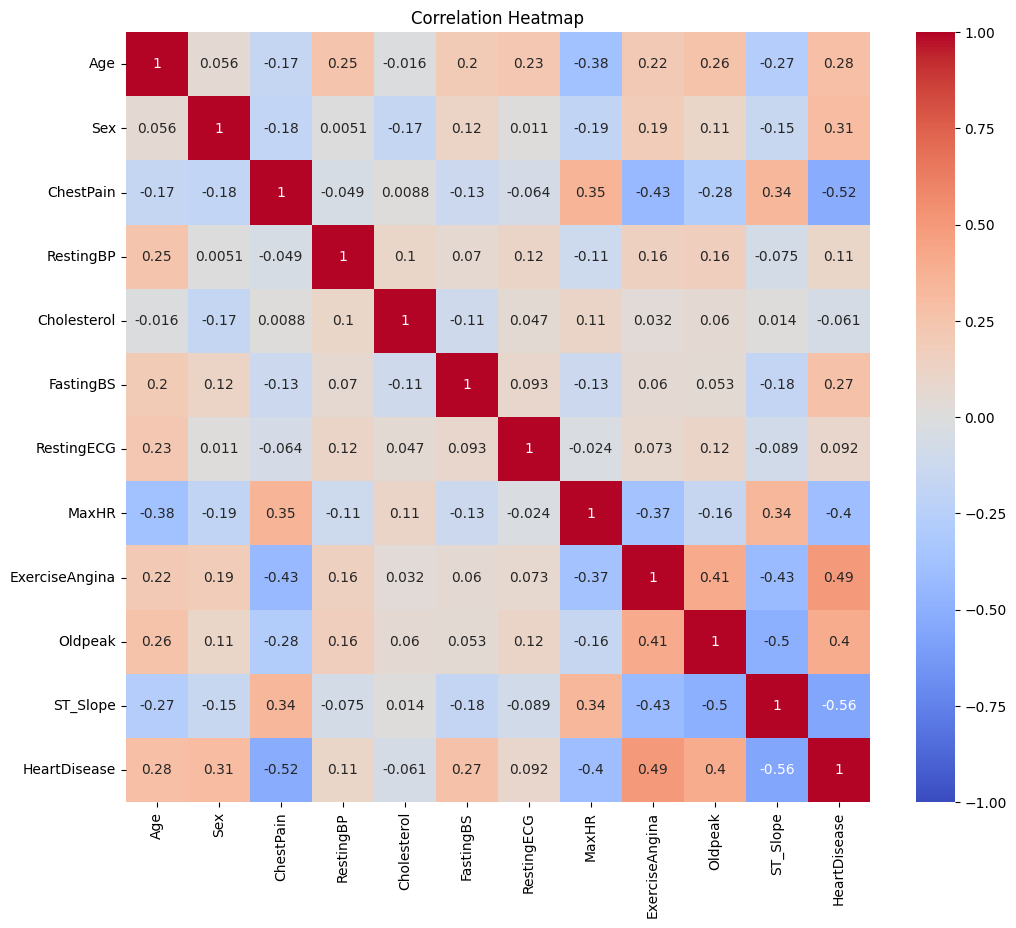

In [ ]:
# Creating correlation heatmap
variable_corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(variable_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

By observing the correlation heatmap above, we find that there are no dependent variables with correlations greater than 0.8, which indicates multicolinearity is not present.

# Data Preprocessing

In [ ]:
# Splitting data into testing/training sets
from sklearn.model_selection import train_test_split

x = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

seed = 5
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,
                                                    random_state = seed)

# Implementing Logisitc Regression

In [ ]:
# Fitting logistic regression model to training data
from sklearn.linear_model import LogisticRegression

random.seed(seed)
lr = LogisticRegression()
lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Predicting outcomes in both training and testing
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

# Analyzing Logistic Regression Model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculating Mean Squared Error (MSE)
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)

lr_mse_table = pd.DataFrame({'Logistic Regression MSE': [round(lr_train_mse, 3),
                                                   round(lr_test_mse, 3)]})
lr_mse_table.rename({0: 'Training', 1: 'Testing'}, axis='index')

,Logistic Regression MSE
Training,0.165
Testing,0.098


In [ ]:
print('LINEAR REGRESSION MODEL')
print('---')
print('Training MSE:', lr_train_mse)
print('Test MSE:', lr_test_mse)

LINEAR REGRESSION MODEL
---
Training MSE: 0.164850136239782
Test MSE: 0.09782608695652174


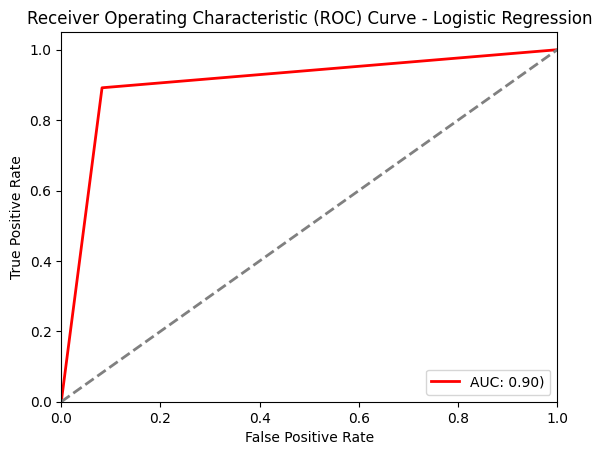

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculating AUC of ROC curve
fpr, tpr, _ = roc_curve(y_test, y_lr_test_pred)
roc_auc = auc(fpr, tpr)

# Graphic ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red', lw=lw, label=f'AUC: {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

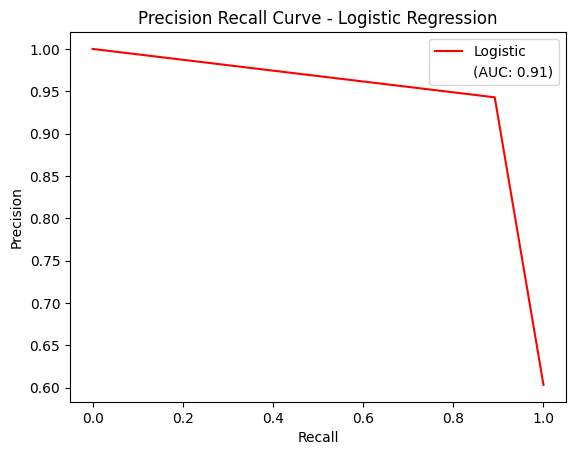

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Calculating AUC of precision/recall curve
average_precision = average_precision_score(y_test, y_lr_test_pred)
precision, recall, thresholds = precision_recall_curve(y_test, y_lr_test_pred)

# Graphing precision/recall curve
plt.plot(recall, precision, color="red", label='Logistic')
plt.plot([], [], ' ', label=f'(AUC: {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.title(f'Precision Recall Curve - Logistic Regression')
plt.show()

# Implementing Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Fitting random forest model to training data
rf = RandomForestRegressor(max_depth=2, random_state=seed)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=5)

In [ ]:
# Predicting outcomes in both training and testing
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

# Analyzing Random Forest Model

In [ ]:
# Calculating Mean Squared Error (MSE)
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)

rf_mse_table = pd.DataFrame({'Random Forest MSE': [round(rf_train_mse, 3),
                                                   round(rf_test_mse, 3)]})
rf_mse_table.rename({0: 'Training', 1: 'Testing'}, axis='index')

,Random Forest MSE
Training,0.122
Testing,0.102


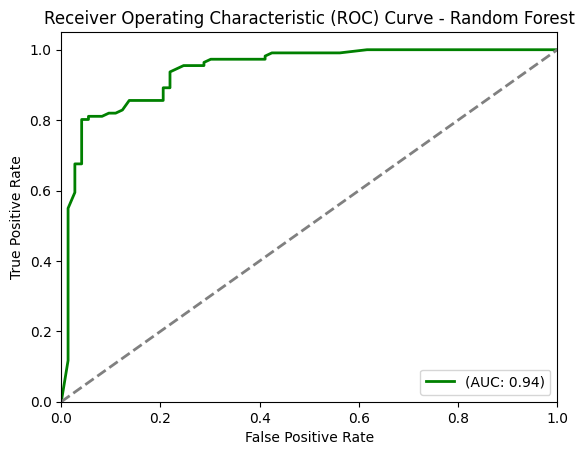

In [ ]:
# Calculating AUC score of ROC curve
fpr, tpr, _ = roc_curve(y_test, y_rf_test_pred)
roc_auc = auc(fpr, tpr)

# Graphing ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='green', lw=lw, label=f'(AUC: {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

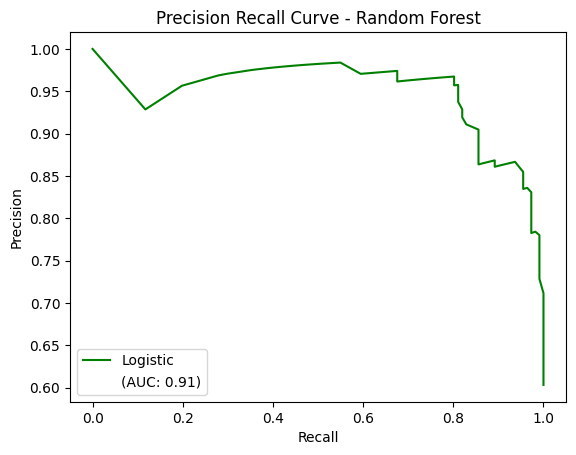

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Calculating AUC of precision/recall curve
average_precision = average_precision_score(y_test, y_lr_test_pred)
precision, recall, thresholds = precision_recall_curve(y_test, y_rf_test_pred)

# Graphing precision/recall curve
plt.plot(recall, precision, color='green', label='Logistic')
plt.plot([], [], ' ', label=f'(AUC: {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="best")
plt.title(f'Precision Recall Curve - Random Forest')
plt.show()

# Comparing Models

In [ ]:
from scipy.stats import wilcoxon

# Calculating Wilcoxan statistic and its p-value
stat, p_value = wilcoxon(y_lr_test_pred, y_rf_test_pred)

wilcox_df = pd.DataFrame({'' : [stat.round(), p_value.round(3)]})
wilcox_df.rename({0: 'Wilcoxan Statistic', 1: 'P-value'}, axis='index')

,
Wilcoxan Statistic,6131.000
P-value,0.001


Since the p-value for the Wilcoxan test is less than a significance level of 0.05, then we have evidence to suggest that there is a statistically significant difference between the logistic regression and random forest models.

In [ ]:
# Creating a table comparing model MSE's
metrics_data = {'Training MSE':[round(lr_train_mse, 3), round(rf_train_mse, 3)],
                'Test MSE':[round(lr_test_mse, 3), round(rf_test_mse, 3)]}

metrics_df = pd.DataFrame(metrics_data)
metrics_df.rename({0:'Logistic Regression', 1:'Random Forest'}, axis='index')

,Training MSE,Test MSE
Logistic Regression,0.165,0.098
Random Forest,0.122,0.102


# Conclusion

In this project, we implemented a Random Forest and Logistic Regression model to accurately predict heart disease among patients.

Through comprehensive data preprocessing and exploratory data analysis, I ensured that the dataset was clean and ready for modeling. After building our models, we utilized ROC, Precision/Recall and MSE to evaluate our models, where we found very good predictive performance. We then used the Wilcoxan test to conclude a statistically significant difference between the two models. However, since both models performance nearly equally as well, this implies that there is an underlying advantage for one of the models.






